In [ ]:
from google.colab import files  # из библиотеки google.colab импортируем класс files
import pandas as pd             # для вывода данных
from sklearn.preprocessing import StandardScaler                          # импортируем класс StandardScaler для нормализации данных

In [ ]:
uploaded = files.upload()       # загружаем файл с данными с компьютера

In [ ]:
train = pd.read_csv('/content/milk_dataset_1.csv')      # применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train.head(3)

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Physique,Individual intolerance,Usefulness of the product for humans
0,2.9,2.5,4.7,53.0,10,70,175,25,2,1,0
1,2.9,2.5,4.7,53.0,9,58,163,32,1,1,0
2,2.9,2.5,4.7,53.0,8,85,187,40,3,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Proteins (g)                          184 non-null    float64
 1   Fats (g)                              184 non-null    float64
 2   Carbohydrates (g)                     184 non-null    float64
 3   Calories                              184 non-null    float64
 4   Days until the end of the shelf life  184 non-null    int64  
 5   Weight (kg)                           184 non-null    int64  
 6   Height (cm)                           184 non-null    int64  
 7   Age                                   184 non-null    int64  
 8   Physique                              184 non-null    int64  
 9   Individual intolerance                184 non-null    int64  
 10  Usefulness of the product for humans  184 non-null    int64  
dtypes: float64(4), int6

Поработаем с категориальными переменными (categorical variable).
  
Т.к. категории телосложений выражены числами 1(худощавое), 2(среднее), 3(спортивное), 4(полное), то модель воспримет их в качестве количественных переменных, а не категориальных, поэтопу применим one-hot encoding. В библиотеке Pandas есть метод .get_dummies(), который как раз и выполнит необходимые преобразования.

In [ ]:
physique = pd.get_dummies(train['Physique'], drop_first = True)       # разбиваем телосложение на категории "1", "2", "3" и "4", затем отбрасываем столбец "1", т.к. он избыточен

In [ ]:
train = pd.concat([train, physique], axis = 1)              # проводим конкатенацию нашего основного набора данных с полученным ранее набором категорий телосложения
train

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Physique,Individual intolerance,Usefulness of the product for humans,2,3,4
0,2.9,2.5,4.7,53.0,10,70,175,25,2,1,0,1,0,0
1,2.9,2.5,4.7,53.0,9,58,163,32,1,1,0,0,0,0
2,2.9,2.5,4.7,53.0,8,85,187,40,3,1,0,0,1,0
3,2.9,2.5,4.7,53.0,7,62,158,19,3,1,0,0,1,0
4,2.9,2.5,4.7,53.0,6,90,195,45,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2.0,0.1,4.8,31.0,7,62,158,25,4,0,1,0,0,1
180,2.0,0.1,4.8,31.0,7,62,158,40,4,0,1,0,0,1
181,2.0,0.1,4.8,31.0,7,62,158,60,4,0,1,0,0,1
182,2.0,0.1,4.8,31.0,7,62,158,85,4,0,1,0,0,1


In [ ]:
train.drop(['Physique'], axis = 1, inplace = True)      # избавляемся от уже ненужного столбца 'Physique'
train.head(3)                                           # показываем получившийся набор данных

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Individual intolerance,Usefulness of the product for humans,2,3,4
0,2.9,2.5,4.7,53.0,10,70,175,25,1,0,1,0,0
1,2.9,2.5,4.7,53.0,9,58,163,32,1,0,0,0,0
2,2.9,2.5,4.7,53.0,8,85,187,40,1,0,0,1,0


Оставшиеся переменные представляют собой либо количественные, либо категориальные признаки, выражены через 0 и 1.

Для избежания ситуации, в которой модель неоправданно придает большее значение признаку с большей числовой характеристикой, получая соответственно ошибочный результат, проведем нормализацию данных и приведем количественные переменные к одному масштабу.

In [ ]:
scaler = StandardScaler()                                                 # создадим объект класса StandardScaler
cols_to_scale = ['Proteins (g)', 'Fats (g)', 'Carbohydrates (g)',
                 'Calories', 'Days until the end of the shelf life',
                 'Weight (kg)', 'Height (cm)', 'Age']                     # выберем те столбцы, которые мы хотим масштабировать
scaler.fit(train[cols_to_scale])                                          # рассчитаем среднее арифметическое и СКО для масштабирования данных
train[cols_to_scale] = scaler.transform(train[cols_to_scale])             # нормализуем данные

train                                                                     # посмотрим на результат

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Individual intolerance,Usefulness of the product for humans,2,3,4
0,0.532014,0.120858,-1.455556,0.106348,1.876773,0.141854,0.381744,-0.547051,1,0,1,0,0
1,0.532014,0.120858,-1.455556,0.106348,1.548828,-0.611065,-0.366162,-0.232637,1,0,0,0,0
2,0.532014,0.120858,-1.455556,0.106348,1.220883,1.083003,1.129650,0.126693,1,0,0,1,0
3,0.532014,0.120858,-1.455556,0.106348,0.892937,-0.360092,-0.677790,-0.816549,1,0,0,1,0
4,0.532014,0.120858,-1.455556,0.106348,0.564992,1.396719,1.628254,0.351275,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-1.318858,-1.200201,0.687023,-1.194248,0.892937,-0.360092,-0.677790,-0.547051,0,1,0,0,1
180,-1.318858,-1.200201,0.687023,-1.194248,0.892937,-0.360092,-0.677790,0.126693,0,1,0,0,1
181,-1.318858,-1.200201,0.687023,-1.194248,0.892937,-0.360092,-0.677790,1.025020,0,1,0,0,1
182,-1.318858,-1.200201,0.687023,-1.194248,0.892937,-0.360092,-0.677790,2.147928,0,1,0,0,1


In [ ]:
train.columns = train.columns.map(str)               # приведем все названия колонок к строковому формату

In [ ]:
X_all = train.drop('Usefulness of the product for humans', axis = 1)         # поместим в X_all все кроме столбца 'Usefulness of the product for humans', т.е. нашего target
y_all = train['Usefulness of the product for humans']                        # столбец 'Usefulness of the product for humans' станет нашей целевой переменной

In [ ]:
X_all.head(3)

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Individual intolerance,2,3,4
0,0.532014,0.120858,-1.455556,0.106348,1.876773,0.141854,0.381744,-0.547051,1,1,0,0
1,0.532014,0.120858,-1.455556,0.106348,1.548828,-0.611065,-0.366162,-0.232637,1,0,0,0
2,0.532014,0.120858,-1.455556,0.106348,1.220883,1.083003,1.129650,0.126693,1,0,1,0


In [ ]:
X=X_all.values        # для большего удобства приведем наши данные к типу numpy.ndarray
y=y_all.values
X

array([[ 0.53201396,  0.12085776, -1.45555627, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53201396,  0.12085776, -1.45555627, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53201396,  0.12085776, -1.45555627, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.31885814, -1.20020133,  0.68702256, ...,  0.        ,
         0.        ,  1.        ],
       [-1.31885814, -1.20020133,  0.68702256, ...,  0.        ,
         0.        ,  1.        ],
       [-1.31885814, -1.20020133,  0.68702256, ...,  0.        ,
         0.        ,  1.        ]])

# Обучение модели

В итоге мы привели данные к необходимому виду, далее можем разбивать нашу выборку на тренировочную и тестовую части и проризводить обучение модели методом градиентного бустинга.

In [ ]:
import numpy as np                                              # для математических вычислений
import sklearn                                                  # воспользуемся библиотекой, в которой уже разработан метод градиентного бустинга
from sklearn.model_selection import train_test_split            # для разделения наших данных на тестовую и тренировочную выборки
from sklearn.ensemble import GradientBoostingRegressor          # метод градиентного бустинга

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)       # формирование наших выборок

In [ ]:
np.random.seed(2)
sklearn_model = GradientBoostingRegressor()
sklearn_model.fit(X_train, y_train)                             # применение градиентного бустинга и обучение модели на тренировочной выборке

GradientBoostingRegressor()

In [ ]:
y_pred_train = sklearn_model.predict(X_train)                   # модель обученав => посмотрим, как хорошо она предскажет данные, на которых обучалась

In [ ]:
import matplotlib.pyplot as plt                                 # для отрисовки графиков и более наглядного представления полученных результатов

def plot_two_ys(y_pred, y_test, y_pred_name, y_test_name):
  plt.figure(figsize=(15, 10))
  plt.plot(y_pred, label=y_pred_name)
  plt.plot(y_test, label=y_test_name)
  plt.legend(fontsize=20)
  plt.xlabel('Observation number', fontsize=20)
  plt.ylabel('Usefulness of the product for humans', fontsize=20)
  plt.show()

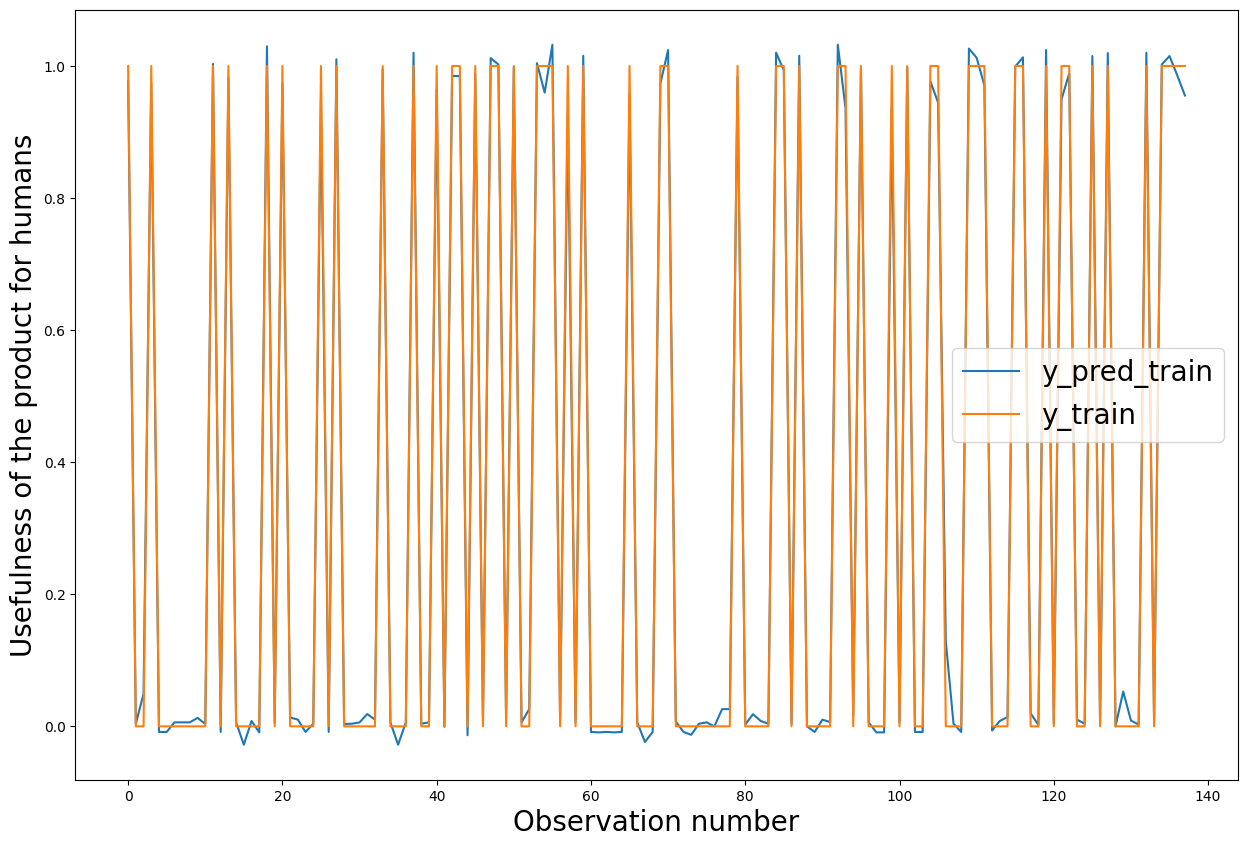

In [ ]:
plot_two_ys(y_pred_train,  y_train, "y_pred_train", "y_train")

Видим, что обучение модели прошло успешно и она себя отлично показывает на тренировочной выборке. Далее посмотрим на результаты тестовой выборки.

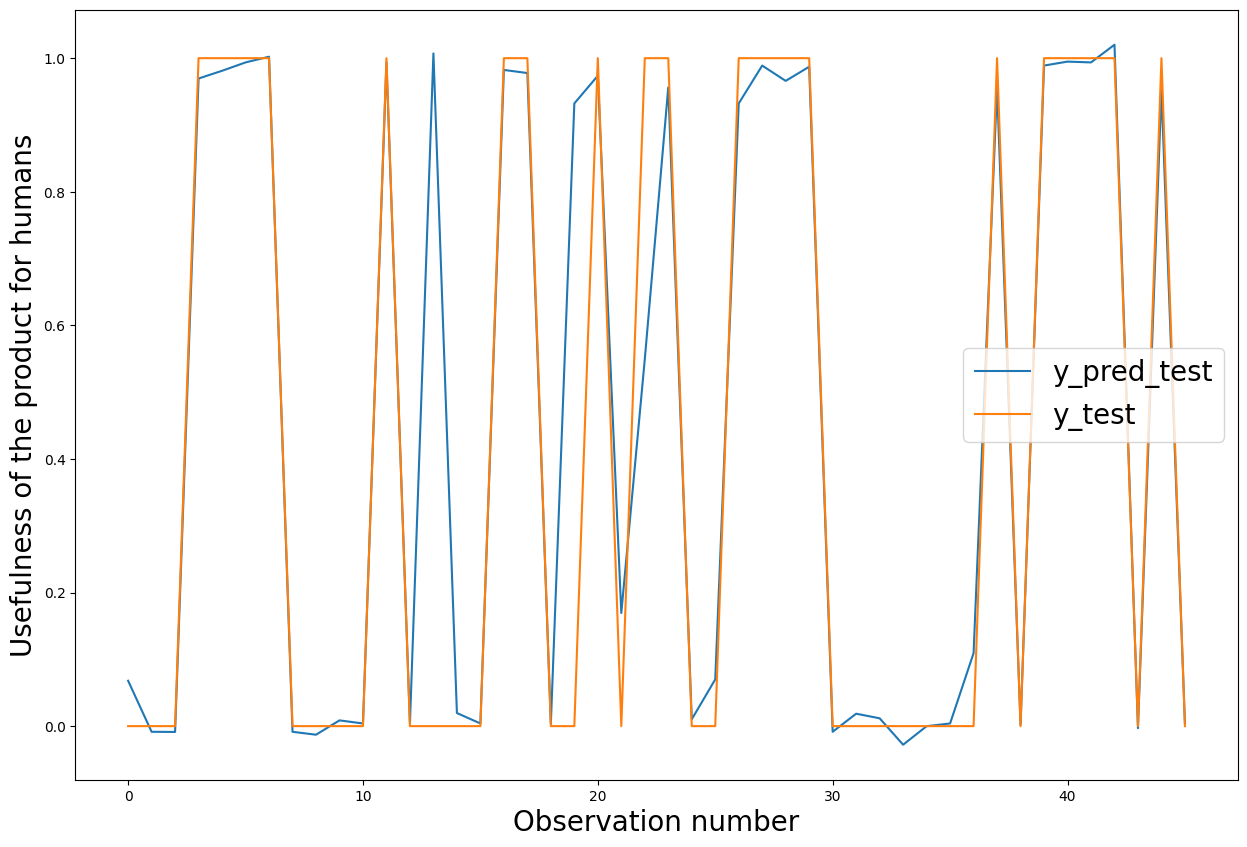

In [ ]:
y_pred_test = sklearn_model.predict(X_test)
plot_two_ys(y_pred_test,  y_test, "y_pred_test", "y_test")

Видим, что модель на тестовой выборке показывает себя чуть хуже, но все равно работает достаточно точно.

# Получение конкретных значений

In [ ]:
!pip install pytesseract                # т.к. pytesseract нет в google colab
!apt install tesseract-ocr-rus          # для русского языка

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-rus is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import pytesseract                    # для чтения текста с картинок
#from PIL import Image
import cv2                            # для работы с картинками
from google.colab.patches import cv2_imshow

config = r'--oem 3 --psm 6'           # для наибольшей точности считывания текста с картинок
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract')

In [ ]:
uploaded1 = files.upload()

In [397]:
import re                           # библиотека для регулярных выражений

def text_preprocessing(str):        # предобработка текста с картинки - вычленение информации о белках, жирах, углеводах и калорийности
  arr_info=[0,0,0,0]

  match = re.search(r'\bбелк[аио]?в?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE)           # выделяем белки
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[0]=float(tmp_str)

  match = re.search(r'\bжир[аыов]?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE)             # выделяем жиры
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[1]=float(tmp_str)

  match = re.search(r'\b[жи]?р[аыов]?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE)          # выделяем жиры
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[1]=float(tmp_str)

  match = re.search(r'\bуглевод[ыо]?в?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE)        # выделяем углеводы
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[2]=float(tmp_str)

  match = re.search(r'[\d]+(.[\d]+)?\sккал', str, re.IGNORECASE)                                              # выделяем калорийность
  if match:
    tmp_str_match=re.search(r'[\d]+(.[\d]+)?', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[3]=float(tmp_str)

  return arr_info

In [394]:
def image_recognition(img_name):                                  # предобработка текста с фотографии продукта. Фотография рассматривается в rgb, gray и white-black цветах для достижения наибольшей точности
  img_info=[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
  img=[0,0,0]
  img_text=["","",""]
  img_info_res=[0, 0, 0, 0]

  img[0]=cv2.imread(img_name)
  img[1]=cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
  (thresh, img[2]) = cv2.threshold(img[1], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

  #numpy_horizontal_concat = np.concatenate((img[0], img[0]), axis=1)                # наглядное представление, какие картинки мы получаем
  #cv2_imshow(numpy_horizontal_concat)
  #numpy_horizontal_concat = np.concatenate((img[1], img[2]), axis=1)
  #cv2_imshow(numpy_horizontal_concat)

  for i in range(3):
    img_text[i]=pytesseract.image_to_string(img[i], lang='rus', config=config)      # получаем текст с картинки
    img_info[i]=text_preprocessing(img_text[i])                 # получаем информацию по данной фотографии белки-жиры-углеводы-калорийность

    for j in range(4):
      if img_info[i][j]!=0:
        img_info_res[j]=img_info[i][j]                          # итоговые значения собираются со всех трех вариантов картинки

  return img_info_res


In [390]:
def data_normalization(img_info, days, human_characteristics):            # нормализация данных

  cols_names = ['Proteins (g)', 'Fats (g)', 'Carbohydrates (g)', 'Calories',
       'Days until the end of the shelf life', 'Weight (kg)', 'Height (cm)',
       'Age', 'Individual intolerance', '2', '3', '4']

  data=[img_info[0], img_info[1], img_info[2], img_info[3], days, human_characteristics[0], human_characteristics[1], human_characteristics[2], human_characteristics[4], 0, 0, 0]

  if(human_characteristics[3]==2):                                        # вручную забиваем параметры телосложения
    data[9]=1
  elif human_characteristics[3]==3:
    data[10]=1
  elif human_characteristics[3]==3:
    data[11]=1

  df = pd.DataFrame([data], columns=cols_names)                           # преобразуем наши данные к удобному типу

  cols_to_scale = ['Proteins (g)', 'Fats (g)', 'Carbohydrates (g)',
                 'Calories', 'Days until the end of the shelf life',
                 'Weight (kg)', 'Height (cm)', 'Age']

  df[cols_to_scale] = scaler.transform(df[cols_to_scale])                 # нормализация
  df.columns = df.columns.map(str)                                        # приведем все названия колонок к строковому формату
  X_tmp = df.values

  return X_tmp

In [391]:
def decision(img_name, days, human_characteristics):

  img_info = image_recognition(img_name)                                  # получаем необходимые данные с картинки

  for i in range(4):                                                      # если не удалось прочитать данные с фото, берем среднее из нашей обученной модели
    if(img_info[i]==0):
      img_info[i]=scaler.mean_[i]

  X_res = data_normalization(img_info, days, human_characteristics)       # нормализуем значения

  y_pred_res = sklearn_model.predict(X_res)                               # получаем ответ на вопрос "полезен ли конкретный продукт для конкретного человека"

  return y_pred_res


In [396]:

#image_recognition('milk9.jpg')
#data_normalization(image_recognition('milk1.jpg'), 5, [65, 175, 15, 1, 0])
#decision('milk9.jpg', 7, [95, 165, 15, 4, 0])
decision('milk1.jpg', 7, [62, 158, 89, 4, 0])

array([0.30910915])